# Set-Up

In [ ]:
%load_ext autoreload
%autoreload 2

In [2]:
from google.colab import drive
drive.mount('/content/drive/', force_remount = True)

Mounted at /content/drive/


In [3]:
#!pip uninstall tensorflow
#!pip uninstall tensorflow-gpu
!pip install tensorflow==2.0.0
!pip install tensorflow-gpu==2.0.0

!pip3 install tensorlayer

     |████████████████████████████████| 86.3MB 37kB/s 
     |████████████████████████████████| 3.8MB 65.8MB/s 
     |████████████████████████████████| 450kB 49.6MB/s 
     |████████████████████████████████| 51kB 8.5MB/s 
  Created wheel for gast: filename=gast-0.2.2-cp36-none-any.whl size=7542 sha256=f5d5f7f75f950b61899dbf45aeeb3599eb0b8ee16ef6f8fc5d068877e21c4141
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built gast
ERROR: tensorflow-probability 0.11.0 has requirement gast>=0.3.2, but you'll have gast 0.2.2 which is incompatible.
  Found existing installation: gast 0.3.3
    Uninstalling gast-0.3.3:
      Successfully uninstalled gast-0.3.3
  Found existing installation: tensorboard 2.3.0
    Uninstalling tensorboard-2.3.0:
      Successfully uninstalled tensorboard-2.3.0
  Found existing installation: tensorflow-estimator 2.3.0
    Uninstalling tensorflow-estimator-2.3.0:
      Successfully uninstalled tenso

In [4]:
import tensorflow as tf
import tensorlayer as tl
import os
import shutil
print(tf.test.is_gpu_available())
# TODO: Fill in the Google Drive path where you uploaded the assignment
# Example: If you create a 2020FA folder and put all the files under A3 folder, then '2020FA/A3'
GOOGLE_DRIVE_PATH_AFTER_MYDRIVE = "ProjectX 2020/Spatial SR"
GOOGLE_DRIVE_PATH = os.path.join('drive', 'My Drive', GOOGLE_DRIVE_PATH_AFTER_MYDRIVE)

gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Select the Runtime > "Change runtime type" menu to enable a GPU accelerator, ')
  print('and then re-execute this cell.')
else:
  print(gpu_info)

True
Sat Nov 28 04:53:31 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 455.38       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   36C    P0    31W / 250W |    265MiB / 16280MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+--

Train **GAN**

In [ ]:
os.chdir('/content/drive/My Drive/ProjectX 2020/Spatial SR/tf-SRGAN')
!python train_clim.py

Streaming output truncated to the last 5000 lines.
Epoch: [1/80] step: [173/187] time: 0.789s, g_loss(mse:0.001, vgg:0.002, adv:0.007) d_loss: 1.378, d_acc: 0.625, psnr: 31.026, ssim: 0.877
Epoch: [1/80] step: [174/187] time: 0.801s, g_loss(mse:0.001, vgg:0.002, adv:0.007) d_loss: 1.377, d_acc: 0.562, psnr: 30.472, ssim: 0.858
Epoch: [1/80] step: [175/187] time: 0.753s, g_loss(mse:0.001, vgg:0.002, adv:0.007) d_loss: 1.382, d_acc: 0.500, psnr: 31.259, ssim: 0.864
Epoch: [1/80] step: [176/187] time: 0.792s, g_loss(mse:0.001, vgg:0.002, adv:0.007) d_loss: 1.384, d_acc: 0.500, psnr: 31.405, ssim: 0.865
Epoch: [1/80] step: [177/187] time: 0.753s, g_loss(mse:0.001, vgg:0.002, adv:0.007) d_loss: 1.384, d_acc: 0.500, psnr: 30.622, ssim: 0.851
Epoch: [1/80] step: [178/187] time: 0.809s, g_loss(mse:0.001, vgg:0.002, adv:0.007) d_loss: 1.383, d_acc: 0.500, psnr: 29.320, ssim: 0.855
Epoch: [1/80] step: [179/187] time: 0.820s, g_loss(mse:0.001, vgg:0.002, adv:0.007) d_loss: 1.381, d_acc: 0.500, ps

0.00024669748
35.423948890284485
0.8978019607694525


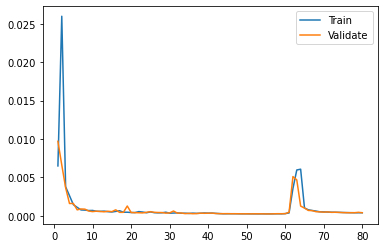

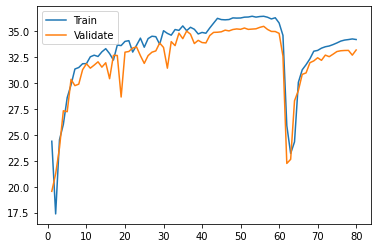

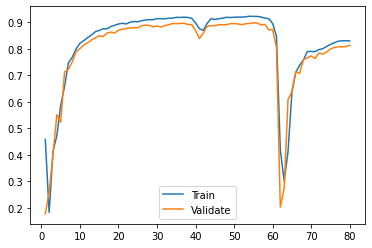

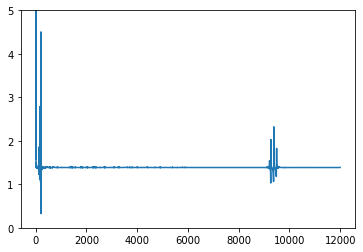

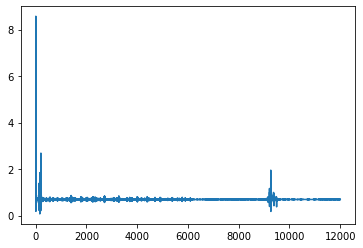

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os
os.chdir('/content/drive/My Drive/ProjectX 2020/Spatial SR/tf-SRGAN/2020-11-20 04:35:17/samples/')
mse2 = np.load('mse_train.npy')
plt.figure()
plt.plot(np.linspace(1, len(mse2), len(mse2)), mse2)
mse2 = np.load('mse_valid.npy')
plt.plot(np.linspace(1, len(mse2), len(mse2)), mse2)
plt.legend(("Train", "Validate"))
print(np.min(mse2))


psnr = np.load('psnr_train.npy')
plt.figure()
plt.plot(np.linspace(1, len(mse2), len(mse2)), psnr)
psnr = np.load('psnr_valid.npy')
plt.plot(np.linspace(1, len(mse2), len(mse2)), psnr)
plt.legend(("Train", "Validate"))
print(np.max(psnr))


ssim = np.load('ssim_train.npy')
plt.figure()
plt.plot(np.linspace(1, len(mse2), len(mse2)), ssim)
ssim = np.load('ssim_valid.npy')
plt.plot(np.linspace(1, len(mse2), len(mse2)), ssim)
plt.legend(("Train", "Validate"))
print(np.max(ssim))



vgg = np.load('discloss_train.npy')
plt.figure()
plt.plot(np.linspace(1, len(vgg), len(vgg)), vgg)
plt.ylim([0, 5])

vgg = np.load('advloss_train.npy')
plt.figure()
plt.plot(np.linspace(1, len(vgg), len(vgg)), vgg)











In [ ]:
import numpy as np
bboxes = np.load('/content/drive/My Drive/ProjectX 2020/Data/1979/' + "1979_boxes.npy");
np.linspace(0, 199, 200)






array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
        11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
        22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,
        33.,  34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,
        44.,  45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,
        55.,  56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,
        66.,  67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,
        77.,  78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,
        88.,  89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,
        99., 100., 101., 102., 103., 104., 105., 106., 107., 108., 109.,
       110., 111., 112., 113., 114., 115., 116., 117., 118., 119., 120.,
       121., 122., 123., 124., 125., 126., 127., 128., 129., 130., 131.,
       132., 133., 134., 135., 136., 137., 138., 139., 140., 141., 142.,
       143., 144., 145., 146., 147., 148., 149., 15

In [ ]:
import tensorlayer as tl
import os
import numpy as np
import matplotlib.pyplot as plt

path = '/content/drive/My Drive/ProjectX 2020/Data/1979/'




ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



0
Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py", line 2882, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-50-7b7f9eab8c65>", line 9, in <module>
    os.remove(path + str(i) + ".npy")
FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/My Drive/ProjectX 2020/Data/1979/1979_0.npy'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py", line 1823, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'FileNotFoundError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/IPython/core/ultratb.py", line 1132, in get_records
    return _fixed_getinnerframes(etb, number_of_li

FileNotFoundError: ignored

In [ ]:
import os
os.chdir('/content/drive/My Drive/ProjectX 2020/Spatial SR/tf-SRGAN/')

from model import get_G, get_D
#G = get_G((8, 28, 28, 1))
G


model_1(
  (_inputlayer_2): Input(shape=(8, 28, 28, 1), name='_inputlayer_2')
  (conv2d_39): Conv2d(in_channels=1, out_channels=64, kernel_size=(3, 3), strides=(1, 1), padding=SAME, relu, name='conv2d_39')
  (conv2d_40): Conv2d(in_channels=64, out_channels=64, kernel_size=(3, 3), strides=(1, 1), padding=SAME, bias=False, No Activation, name='conv2d_40')
  (batchnorm2d_34): BatchNorm2d(num_features=None, decay=0.9, epsilon=1e-05, relu, name="batchnorm2d_34")
  (conv2d_41): Conv2d(in_channels=64, out_channels=64, kernel_size=(3, 3), strides=(1, 1), padding=SAME, bias=False, No Activation, name='conv2d_41')
  (batchnorm2d_35): BatchNorm2d(num_features=None, decay=0.9, epsilon=1e-05, No Activation, name="batchnorm2d_35")
  (elementwise_18): Elementwise(combine_fn=<function add at 0x7fbc272c6488>, No Activation, name='elementwise_18')
  (conv2d_42): Conv2d(in_channels=64, out_channels=64, kernel_size=(3, 3), strides=(1, 1), padding=SAME, bias=False, No Activation, name='conv2d_42')
  (batch